In [281]:
import cv2
from google.colab.patches import cv2_imshow


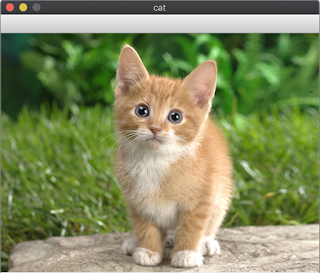

In [282]:
cat = cv2.imread("/content/cat.png") # 고양이 이미지 읽어오기
cv2_imshow(cat)

In [283]:
gray_cat = cv2.cvtColor(cat, cv2.COLOR_BGR2GRAY) # gray톤으로 바꾸기
# cv2_imshow( gray_cat)

In [284]:
hsv_cat = cv2.cvtColor(cat, cv2.COLOR_BGR2HSV) # hsv 으로 바꾸기


In [285]:
h, s, v = cv2.split(hsv_cat)
# cv2_imshow(h)
# cv2_imshow(s)
# cv2_imshow(v)

![색상표](https://i.stack.imgur.com/gyuw4.png)

빨강 0 ~ 5, 170 ~ 180 <br>
주황 5 ~ 25 <br>
노랑 25 ~ 35 <br>
연두 35 ~ 50 <br>
초록 50 ~ 70 <br>
하늘 70 ~ 95 <br>
파랑 95 ~ 115 <br>
남색 115 ~ 125 <br>
보라 125 ~ 140 <br>
연지 140 ~ 170 <br>
빨강 170 ~ 180, 0 ~ 5 <br>

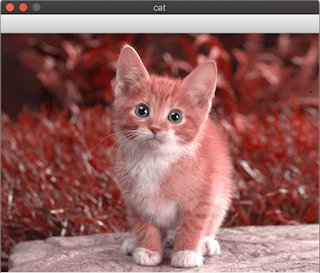

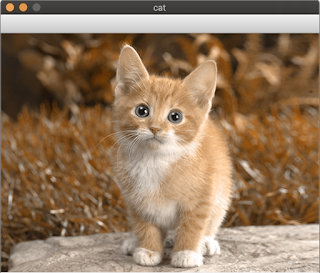

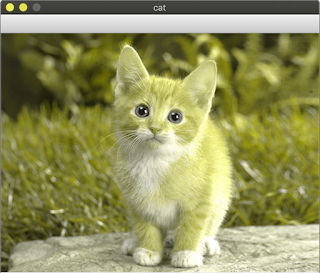

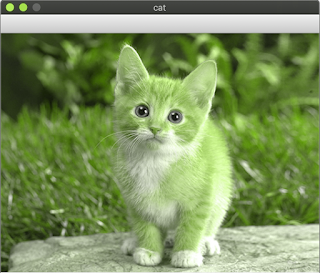

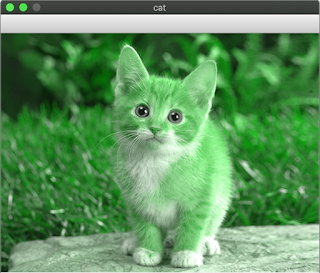

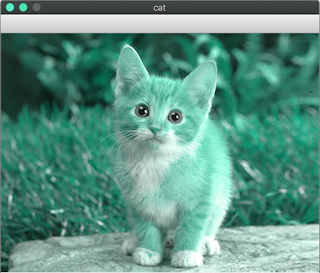

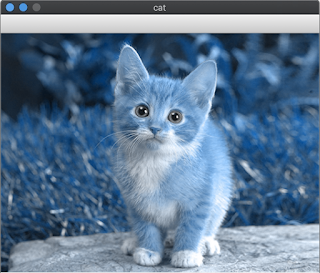

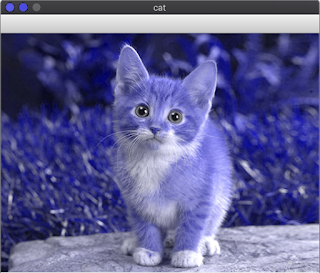

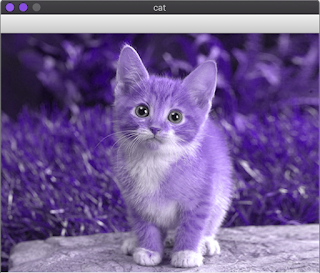

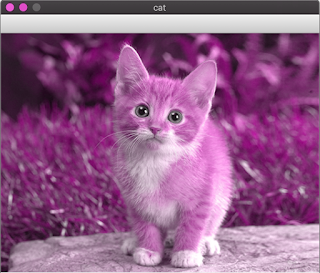

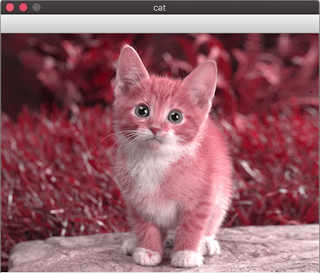

In [286]:
hsv_cat_colorlist = []
colorlist = [0,5,25,35,50,70,95,115,125,140,170,180]
colorlist2 = []
for i in range(len(colorlist)-1):
  colorlist2.append((colorlist[i] + colorlist[i+1])/2)
# print(colorlist2)

for i in range(len(colorlist)-1):
  hsv_cat_colorlist.append(hsv_cat.copy())
  hsv_cat_colorlist[i][:,:,0] = colorlist2[i]
  hsv_cat_colorlist[i] = cv2.cvtColor(hsv_cat_colorlist[i], cv2.COLOR_HSV2BGR)
  cv2_imshow(hsv_cat_colorlist[i])


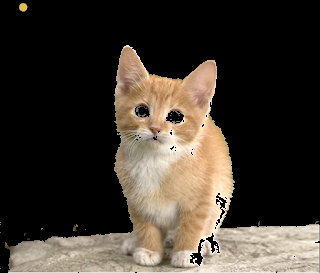

In [287]:
i=1
maskfilter = cv2.inRange(h, colorlist[i], colorlist[i+1]) # 색깔 레인지 정해서 그부분만 255로 바꾸기
cat_maskfilter = cv2.bitwise_and(hsv_cat, hsv_cat, mask = maskfilter) # hsv 파일중에 255 인 부분만 남기기
cat_maskfilter = cv2.cvtColor(cat_maskfilter, cv2.COLOR_HSV2BGR) # hsv를 rgb로 바꾸기

cv2_imshow(cat_maskfilter)


In [288]:
# 색깔별로 같은 비중 확인 (픽셀수)
maskfilterlist = []
for i in range(len(colorlist)-1):
  maskfilter = cv2.inRange(h, colorlist[i], colorlist[i+1])
  maskfilterlist.append(maskfilter.sum()/255 +0.01*i)
print(maskfilterlist)

maskfilterlist[0] = maskfilterlist[0] + maskfilterlist[len(maskfilterlist)-1]
maskfilterlist.pop(len(maskfilterlist)-1) # 마지막 중복 빨강은 삭제
print(maskfilterlist)


[4418.0, 29259.01, 3346.02, 34242.03, 13132.04, 1047.05, 3914.06, 699.07, 86.08, 544.09, 32.1]
[4450.1, 29259.01, 3346.02, 34242.03, 13132.04, 1047.05, 3914.06, 699.07, 86.08, 544.09]


In [289]:
maskfilterlist2 = maskfilterlist.copy()
maskfilterlist2.sort(reverse=True)
print(maskfilterlist)
print(maskfilterlist2)

color_ranklist = []
for i in range(10):
  color_ranklist.append(maskfilterlist.index(maskfilterlist2[i]))
print(color_ranklist) # 컬러 랭킹을 리스트에 담는다.

[4450.1, 29259.01, 3346.02, 34242.03, 13132.04, 1047.05, 3914.06, 699.07, 86.08, 544.09]
[34242.03, 29259.01, 13132.04, 4450.1, 3914.06, 3346.02, 1047.05, 699.07, 544.09, 86.08]
[3, 1, 4, 0, 6, 2, 5, 7, 9, 8]


In [309]:
image_color = cv2.imread("/content/hsv_180color.png") # 색체 이미지 읽어오기
hsv_image_color = cv2.cvtColor(image_color, cv2.COLOR_BGR2HSV) # hsv 으로 바꾸기
hsv_image_color_h, hsv_image_color_s, hsv_image_color_v = cv2.split(hsv_image_color)

hsv_image_color_colorlist = []
colorlist = [0,5,25,35,50,70,95,115,125,140,170,180]
colorlist2 = []
for i in range(len(colorlist)-1):
  colorlist2.append((colorlist[i] + colorlist[i+1])/2)
# print(colorlist2)

for i in range(len(colorlist)-1):
  hsv_image_color_colorlist.append(hsv_image_color.copy())
  hsv_image_color_colorlist[i][:,:,0] = colorlist2[i]
  hsv_image_color_colorlist[i] = cv2.cvtColor(hsv_image_color_colorlist[i], cv2.COLOR_HSV2BGR)
  
# 색깔별로 같은 비중 확인 (픽셀수)
image_color_maskfilterlist = []
for i in range(len(colorlist)-1):
  image_color_maskfilter = cv2.inRange(hsv_image_color_h, colorlist[i], colorlist[i+1])
  image_color_maskfilterlist.append(image_color_maskfilter.sum()/255 +0.01*i)

image_color_maskfilterlist[0] = image_color_maskfilterlist[0] + image_color_maskfilterlist[len(image_color_maskfilterlist)-1]
image_color_maskfilterlist.pop(len(image_color_maskfilterlist)-1) # 마지막 중복 빨강은 삭제


image_color_maskfilterlist2 = image_color_maskfilterlist.copy()
image_color_maskfilterlist2.sort(reverse=True)
print(image_color_maskfilterlist)
print(image_color_maskfilterlist2)

image_color_color_ranklist = []
for i in range(10):
  image_color_color_ranklist.append(image_color_maskfilterlist.index(image_color_maskfilterlist2[i]))
print(image_color_color_ranklist) # 컬러 랭킹을 리스트에 담는다.

[2.5, 15.0, 30.0, 42.5, 60.0, 82.5, 105.0, 120.0, 132.5, 155.0, 175.0]
[24023.1, 29077.01, 15287.02, 22351.03, 29688.04, 36762.05, 29544.06, 15602.07, 22549.08, 44804.09]
[44804.09, 36762.05, 29688.04, 29544.06, 29077.01, 24023.1, 22549.08, 22351.03, 15602.07, 15287.02]
[9, 5, 4, 6, 1, 0, 8, 3, 7, 2]


In [337]:
h_new = h.copy() # 고양이에 새로 쓸 색상h 리스트 생성
h_new[:,:] = 0
h_new

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [338]:
for i in range(10):
# i = 0
  maskfilter = cv2.inRange(h, colorlist[i], colorlist[i+1]) # 색깔 레인지 정해서 그부분만 255로 바꾸기
  maskfilter = maskfilter/255*colorlist2[i]
  maskfilter
  h_new = h_new + maskfilter
  # h_new += maskfilter
print(h_new)

[[  2.5   2.5 120.  ... 120.    2.5   2.5]
 [  2.5 120.  120.  ... 120.  120.    2.5]
 [  2.5 120.  120.  ... 120.  120.    2.5]
 ...
 [ 42.5  42.5  42.5 ...  15.   15.   15. ]
 [ 42.5  60.   60.  ...  15.   15.   15. ]
 [ 60.   60.   42.5 ...  15.   15.   15. ]]


In [318]:
import numpy as np

np.array([0,0,0]) + np.array([1,0,3])

array([1, 0, 3])

In [324]:
h_new + maskfilter

array([[2.5, 2.5, 0. , ..., 0. , 2.5, 2.5],
       [2.5, 0. , 0. , ..., 0. , 0. , 2.5],
       [2.5, 0. , 0. , ..., 0. , 0. , 2.5],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ]])

In [323]:
maskfilter

AttributeError: ignored